# Supervised Learning | Classification (Naive Bayes)


### Importing Libraries


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

## Naive Bayes | Full Case-study (Email Filtering)


### Importing Dataset & Extracting Features


In [55]:
emails = pd.read_csv('data/emails.csv')
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [56]:
emails['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [57]:
spam = emails[emails['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [58]:
ham = emails[emails['spam']==0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [59]:
len(spam) / len(emails) * 100

23.88268156424581

In [60]:
len(ham) / len(emails) * 100

76.11731843575419

### Exploring Data


<AxesSubplot:xlabel='spam', ylabel='count'>

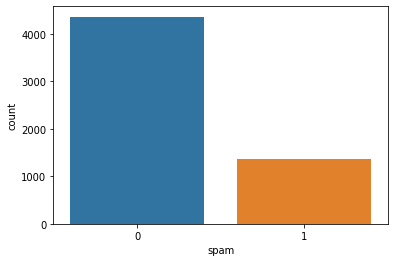

In [61]:
sns.countplot(x = emails['spam'])

### Data Splitting & Preprocessing


In [62]:
# Text encoding example

# from sklearn.feature_extraction.text import CountVectorizer
# my_text = ['I am good','I feel good','You are very good','So far so good']
# cv = CountVectorizer()
# x = cv.fit_transform(my_text)
# print(cv.get_feature_names())
# print(x.toarray())



In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
cv = CountVectorizer()

In [65]:
emails_cv = (cv.fit_transform(emails['text']))

In [66]:
emails_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
X = emails_cv.toarray()

In [68]:
y = emails['spam']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Model Training & Predicting


In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
clf = MultinomialNB()

In [74]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

### Model Evaluation


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
print(accuracy_score(y_test, y_pred))

0.9883659439450027


In [77]:
print(confusion_matrix(y_test, y_pred))


[[1382   16]
 [   6  487]]
